In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from config.detector_config import detectors
import models.detector as de
from models.particle import Particle, LLParticle
import utils.fit_utils as fit_utils
import utils.data_io as data_io
import utils.evaluation as evaluation
from config.plot_config import *

184
Total price is within budget: 5775


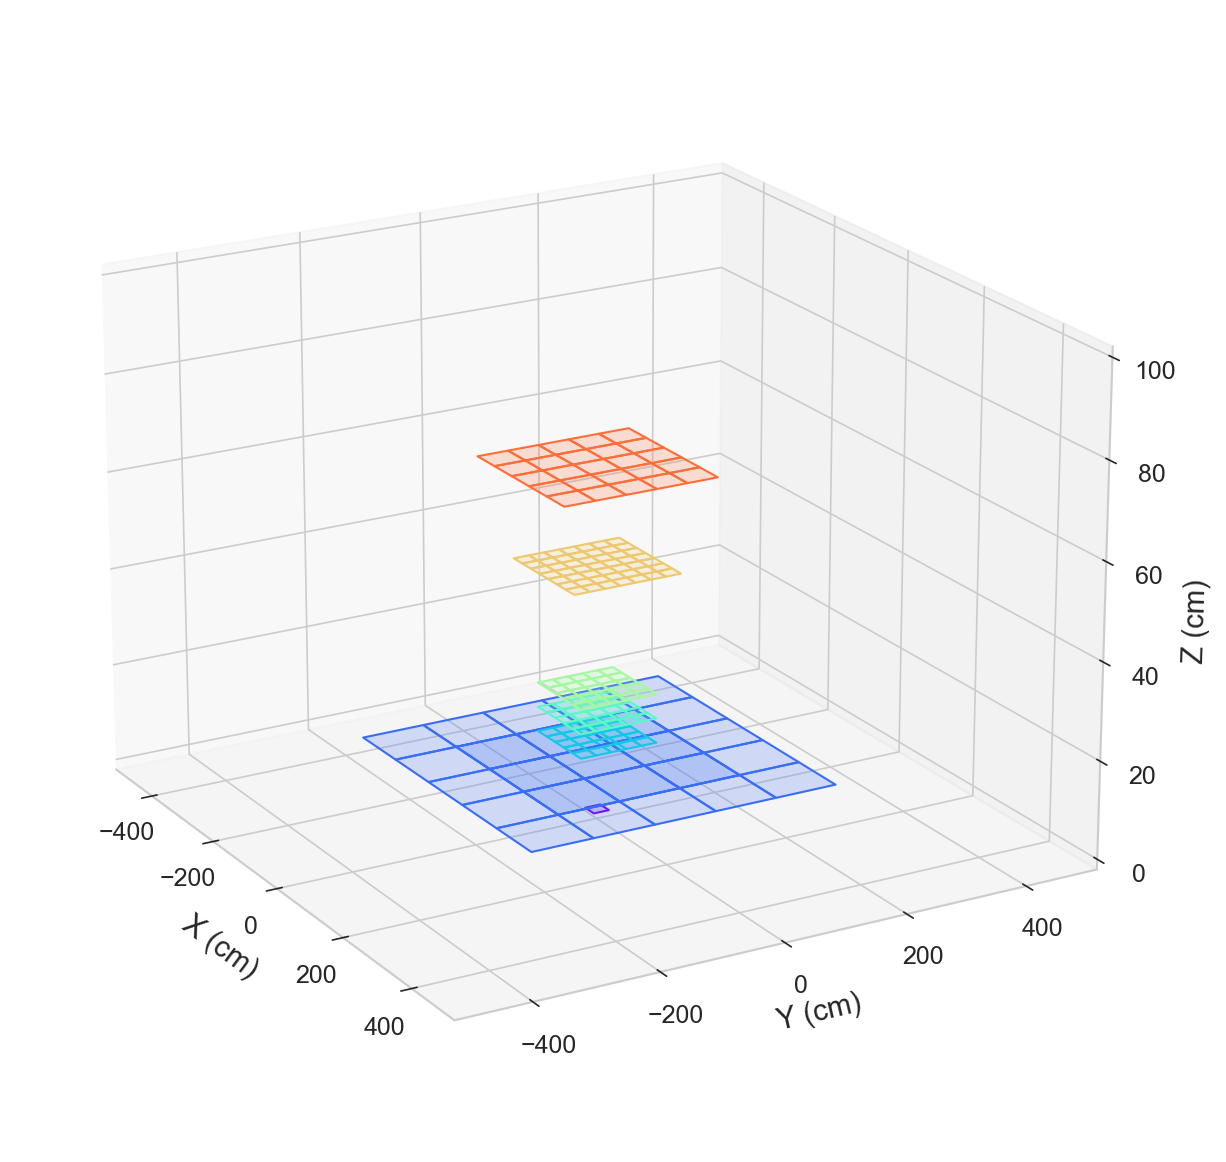

In [2]:
## Test
#detectors = de.Set_Detector_Module(25, 50, 50, 15)
detectors += de.Set_Detector_Module(100, 200, 200, 10)

print(len(detectors))

# Cost
de.Get_Price(detectors)

# Draw detectors
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    d.clear()
    z = d.position[2]
    color = get_color_by_z(z)
    d.plot(ax, color=color)

plt.show()

In [16]:
# Particle Setting
P1 = LLParticle()
P2, P3 = P1.decay()
print(f"Mother particle: {P1}")


print("\n")
print(f"decay product 1: {P2}")
print(f"decay product 1: {P3}")


hit_detectors = [d for d in detectors if d.is_hit(P1)]

print("\n")
print(f"Particle go throuth {len(hit_detectors)} Detector")
for d in hit_detectors:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

time = P1.decay_time

Mother particle: Particle(position=[0. 0. 0.], direction=[-0.30987541 -0.69442991  0.64941845])
Decay time=9.964114113803548, Decay at=[-15.43816965 -34.59689452  32.35439784]
Decay Product1 direction=[-0.02077084 -0.44871897  0.8934315 ]
Decay Product2 direction=[-0.6626384  -0.6629788  -0.34838119]


decay product 1: Particle(position=[-15.43816965 -34.59689452  32.35439784], direction=[-0.02077084 -0.44871897  0.8934315 ]), speed=5.0
decay product 1: Particle(position=[-15.43816965 -34.59689452  32.35439784], direction=[-0.6626384  -0.6629788  -0.34838119]), speed=5.0


Particle go throuth 6 Detector
Center of Detector: (0, 0, 0), lenth: 25, time: 0.0
Center of Detector: (0, 0, 10), lenth: 100, time: 3.0796784300049347
Center of Detector: (0, -25, 15), lenth: 25, time: 4.619517645007402
Center of Detector: (0, -25, 20), lenth: 25, time: 6.159356860009869
Center of Detector: (0, -25, 25), lenth: 25, time: 7.6991960750123365
Center of Detector: (0, 0, 10), lenth: 100, time: 3.07967843

In [17]:
hit_detectors2 = [d for d in detectors if d.is_hit(P2)]
print(f"Particle go throuth {len(hit_detectors2)} Detector")
for d in hit_detectors2:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

hit_detectors3 = [d for d in detectors if d.is_hit(P3)]
print(f"Particle go throuth {len(hit_detectors3)} Detector")
for d in hit_detectors3:
    print(f"Center of Detector: {d.position}, lenth: {d.size}, time: {d.hit_time}")

Particle go throuth 2 Detector
Center of Detector: (-25, -50, 50), lenth: 25, time: 13.91418797368161
Center of Detector: (0, -50, 70), lenth: 50, time: 18.39130790832965
Particle go throuth 4 Detector
Center of Detector: (-100, -100, 10), lenth: 100, time: 22.797412069767397
Center of Detector: (-50, -50, 20), lenth: 25, time: 17.05657393632128
Center of Detector: (-25, -50, 25), lenth: 25, time: 14.186154869598218
Center of Detector: (-100, -100, 10), lenth: 100, time: 22.797412069767397


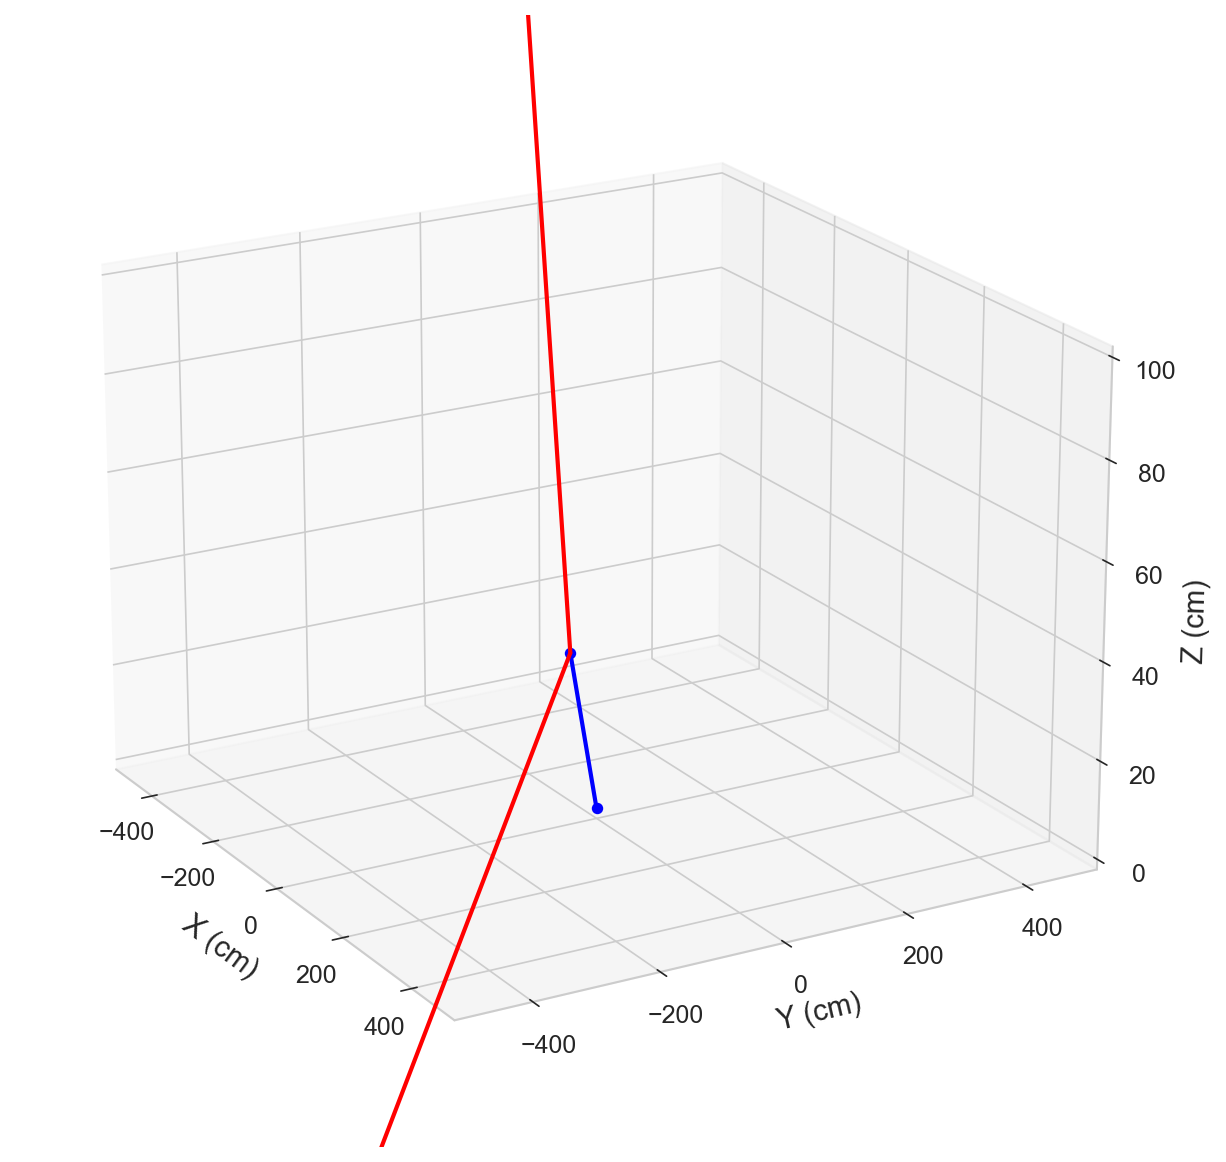

In [18]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)


time = P1.decay_time
ax.scatter(P1.position[0], P1.position[1], P1.position[2], color='b')
ax.scatter(P1.position_t(time)[0], P1.position_t(time)[1], P1.position_t(time)[2], color='b')
ax.plot([P1.position[0], P1.position_t(time)[0]], [P1.position[1],P1.position_t(time)[1]],[P1.position[2],P1.position_t(time)[2]], color="b", zorder=100)
ax.plot([P3.position[0], P3.position_t(100)[0]], [P3.position[1],P3.position_t(100)[1]],[P3.position[2],P3.position_t(100)[2]], color="red", zorder=100)
ax.plot([P2.position[0], P2.position_t(100)[0]], [P2.position[1],P2.position_t(100)[1]],[P2.position[2],P2.position_t(100)[2]], color="red", zorder=100)


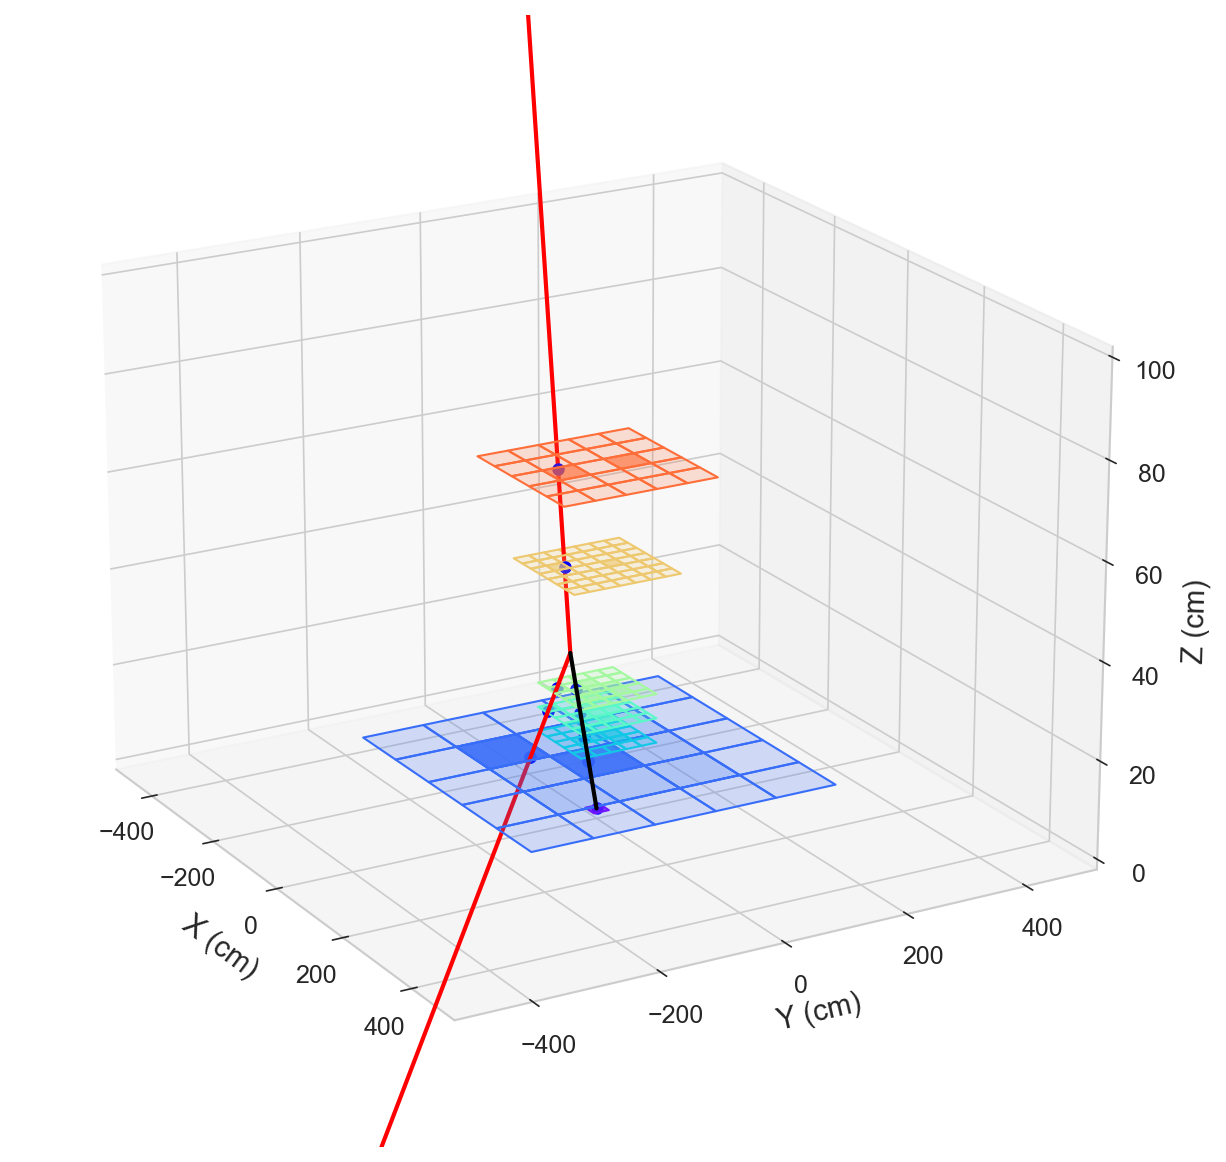

In [19]:
# Draw detectors and particle track
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

for d in detectors:
    z = d.position[2]
    color = get_color_by_z(z)
    if d in hit_detectors or d in hit_detectors2 or d in hit_detectors3:
        pass
    else:
        d.plot(ax, color=color)

def plot_hit_detectors(ax, hit_detectors, particle):
    for d in hit_detectors:
        z = d.position[2]
        color = get_color_by_z(z)
        d.plot(ax, color=color)
        d.interaction_point(ax, particle)

plot_hit_detectors(ax, hit_detectors, P1)
plot_hit_detectors(ax, hit_detectors2, P2)
plot_hit_detectors(ax, hit_detectors3, P3)


Final_Point = P1.position_t(time)
# set high zorder value to make the track line drawn on top of all Detector Module
ax.plot([P1.position[0], Final_Point[0]], [P1.position[1],Final_Point[1]],[P1.position[2],Final_Point[2]], color="black", zorder=999)
ax.plot([P3.position[0], P3.position_t(100)[0]], [P3.position[1],P3.position_t(100)[1]],[P3.position[2],P3.position_t(100)[2]], color="red", zorder=100)
ax.plot([P2.position[0], P2.position_t(100)[0]], [P2.position[1],P2.position_t(100)[1]],[P2.position[2],P2.position_t(100)[2]], color="red", zorder=100)
plt.show()

In [20]:
#data_io.save_detected_data(hit_detectors=hit)
data_io.save_detected_data(detectors, [P1, P2, P3])

data_io.save_truth_data(detectors, [P1, P2, P3])

---

[-15.43816965 -34.59689452  32.35439784]


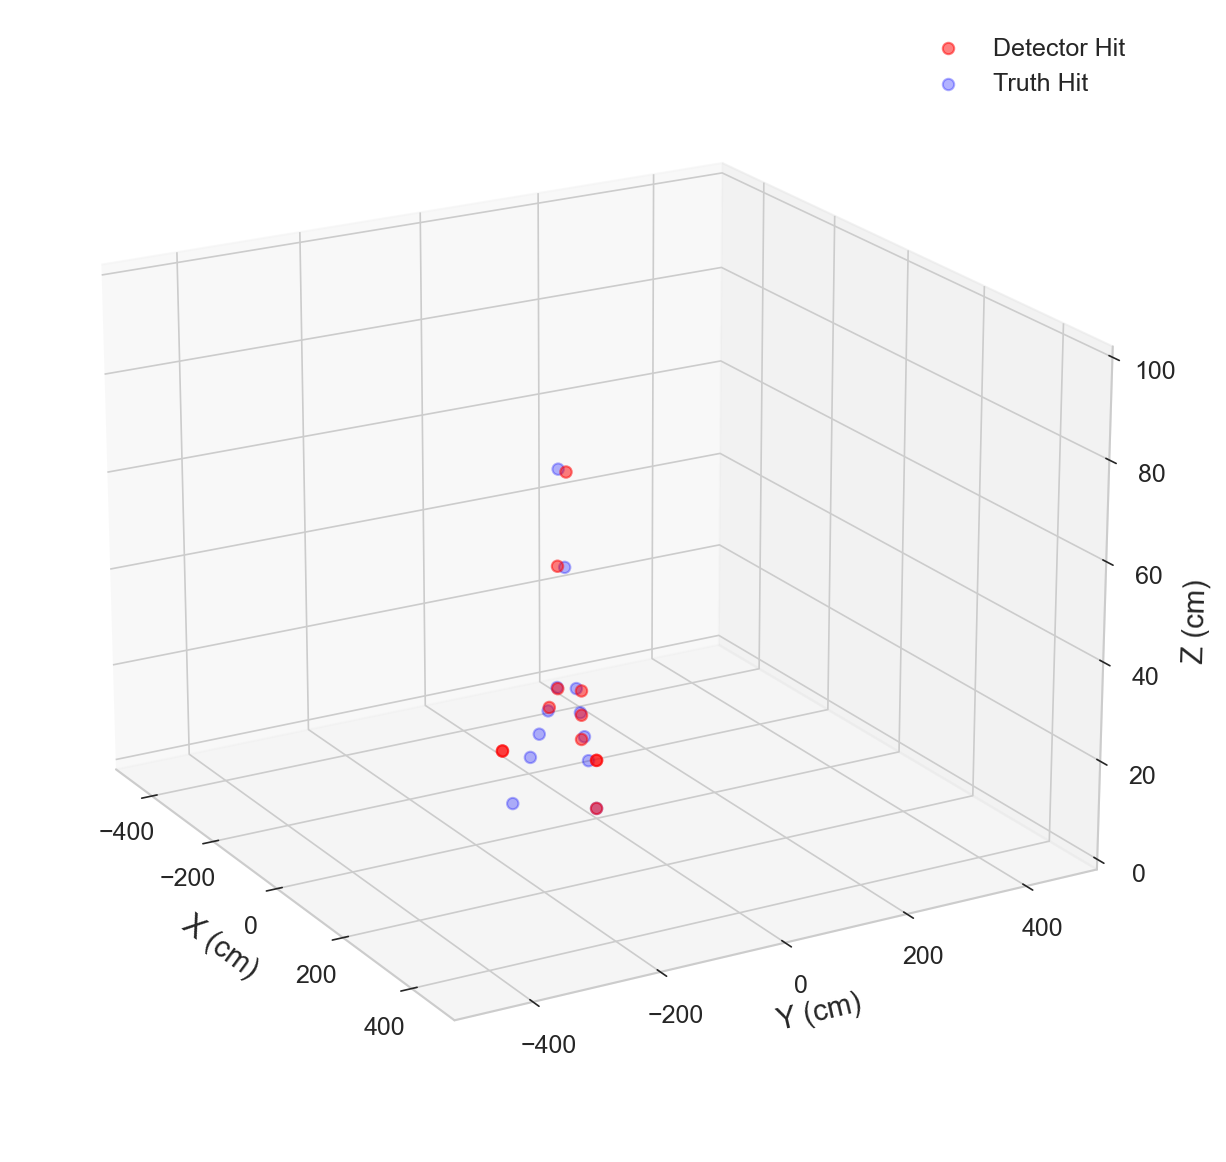

In [21]:
# Read detector data and scatter
detector_data = pd.read_csv('data/detectors.csv')
truth_data = pd.read_csv('data/particle.csv')

# data include:  x, y, z, particle id
recorded = detector_data[['x', 'y', 'z', 'particle id']].values
truth = truth_data[['x', 'y', 'z', 'particle id']].values
rx, ry, rz, ri = recorded.T
tx, ty, tz, ti = truth.T


labels = truth[:,3]
truth_particles = {}
for i in range(1,4):
    truth_particles[i] = truth[labels == i][:, :3]


print(P1.end())

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(rx, ry, rz, c='r', s=30, label='Detector Hit', marker='o', alpha=0.5)
ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)


plt.legend()
plt.show()

Angular Deviation: 0.3591591285080419
RMSE: 9.46
Angular Deviation: 0.998096658249268
RMSE: 14.23
[[-100 -100   10]
 [ -50  -50   20]
 [ -25  -50   25]
 [-100 -100   10]]
[-0.4454354  -0.89087081 -0.08908708]
Angular Deviation: 0.41073567087623153
RMSE: 93.51
rmse all: 95.06


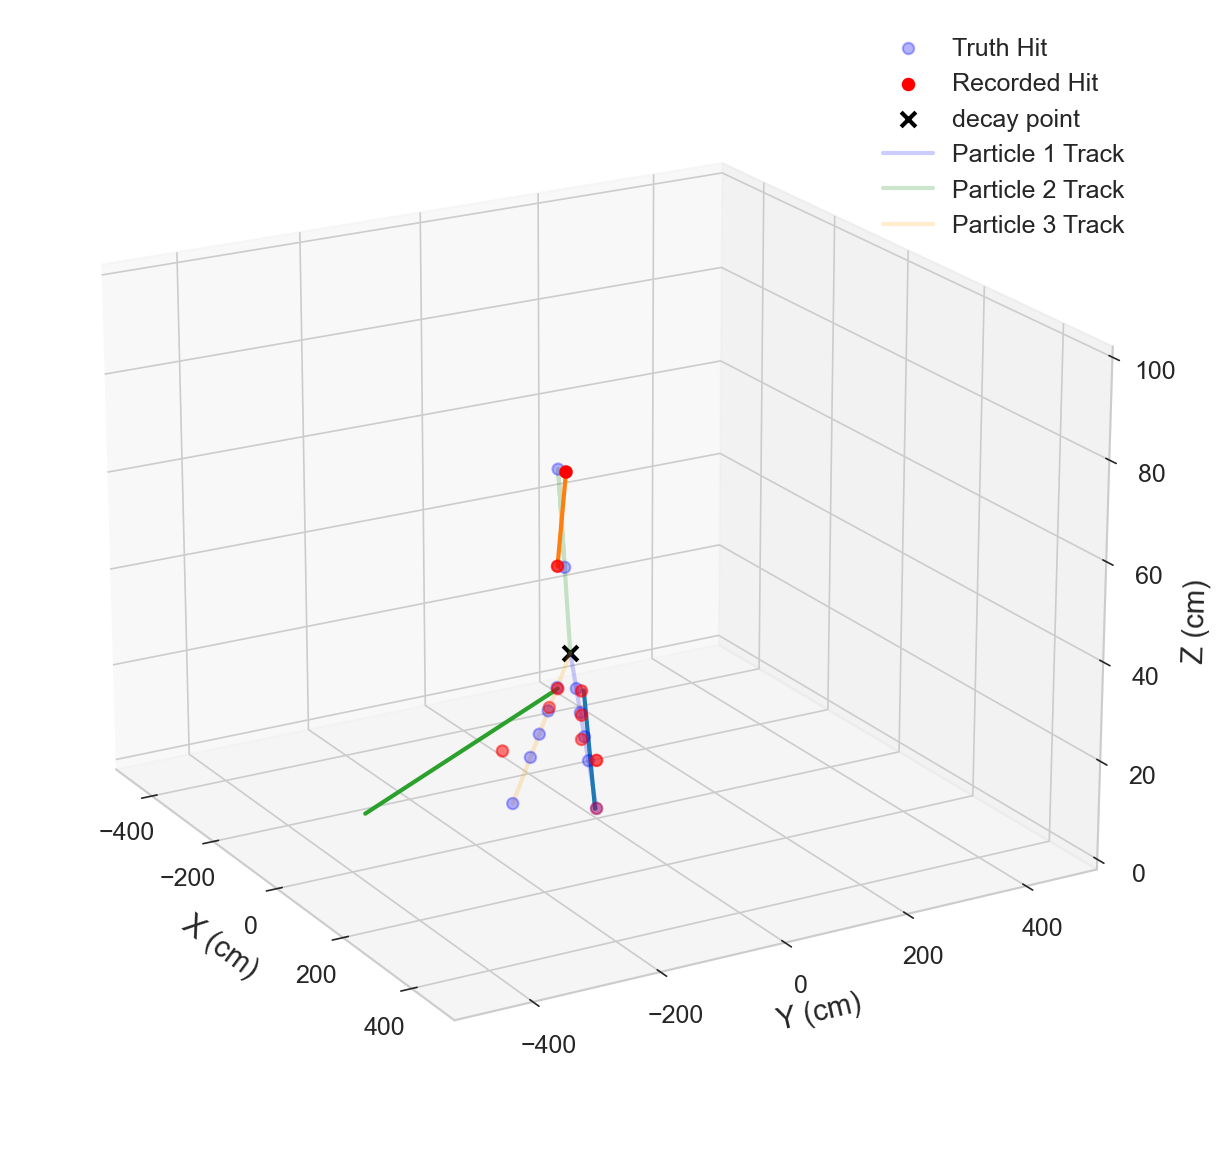

In [ ]:
# Fit particle by particle
labels = recorded[:,3]
recorded_particles = {}
for i in range(1,4):
    recorded_particles[i] = recorded[labels == i][:, :3]


initial1, direction1, init_point1 = fit_utils.Linear_Fit(recorded_particles[1])
evaluation.angular_deviation(P1.direction, direction1)
rmse1 = evaluation.compute_rmse(truth_particles[1], evaluation.get_points(detectors, initial1, direction1, end_z=P1.end()[2]))
zs1 = [truth_particles[1][:,2].min(), truth_particles[1][:,2].max()]
xs1 = init_point1[0] + (zs1 - init_point1[2]) * direction1[0] / direction1[2]
ys1 = init_point1[1] + (zs1 - init_point1[2]) * direction1[1] / direction1[2]



initial2, direction2, init_point2 = fit_utils.Linear_Fit(recorded_particles[2])
evaluation.angular_deviation(P2.direction, direction2)
rmse2 = evaluation.compute_rmse(truth_particles[2], evaluation.get_points(detectors, initial2, direction2, begin_z=P1.end()[2]))
zs2 = [truth_particles[2][:,2].min(), truth_particles[2][:,2].max()]
xs2 = init_point2[0] + (zs2 - init_point2[2]) * direction2[0] / direction2[2]
ys2 = init_point2[1] + (zs2 - init_point2[2]) * direction2[1] / direction2[2]



initial3, direction3, init_point3 = fit_utils.Linear_Fit(recorded_particles[3])
evaluation.angular_deviation(P3.direction, direction3)
rmse3= evaluation.compute_rmse(truth_particles[3], evaluation.get_points(detectors, initial3, direction3, begin_z=P1.end()[2]))
zs3 = [truth_particles[3][:,2].min(), truth_particles[3][:,2].max()]
xs3 = init_point3[0] + (zs3 - init_point3[2]) * direction3[0] / direction3[2]
ys3 = init_point3[1] + (zs3 - init_point3[2]) * direction3[1] / direction3[2]


for i in range(1,4):
    truth_particles[i] = np.vstack([truth_particles[i], P1.end()])



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
configure_plot(ax)

ax.scatter(tx, ty, tz, c='b', s=30, label='Truth Hit', marker='o', alpha=0.3)
ax.scatter(rx, ry, rz, c='r', s=30, label='Recorded Hit', marker='o')
ax.scatter(*P1.end(), c='black', s=50, label='decay point', marker='x')

ax.plot(truth_particles[1][:, 0], truth_particles[1][:, 1], truth_particles[1][:, 2], color='blue', label='Particle 1 Track', alpha=0.2)
ax.plot(truth_particles[2][:, 0], truth_particles[2][:, 1], truth_particles[2][:, 2], color='green', label='Particle 2 Track', alpha=0.2)
ax.plot(truth_particles[3][:, 0], truth_particles[3][:, 1], truth_particles[3][:, 2], color='orange', label='Particle 3 Track', alpha=0.2)


ax.plot(xs1, ys1, zs1)
ax.plot(xs2, ys2, zs2)
ax.plot(xs3, ys3, zs3)

ax.legend()

rmse_all = np.sqrt(rmse1**2 + rmse2**2 + rmse3**2)
print(f"rmse all: {rmse_all:.2f}")